In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pyreadr
import os

import data_pipeline

pd.set_option("display.precision", 2)

# Data preparation

In [3]:
X_train, Y_train, X_test, Y_test = data_pipeline.buildAndSave("SVR") # load / buildAndSave / build

Loading SVR dataset
Done!


In [5]:
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
Y_train = sc_y.fit_transform(Y_train)
Y_train = Y_train.reshape(-1)

# Training

In [7]:
print(X_train.shape, Y_train.shape)

(1027718, 31) (1027718,)


In [8]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf', C = 100, verbose= True)

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [10]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error

print('Train MSE : %.3f'%mean_squared_error(Y_train, regressor.predict(X_train)))

Train MSE : 0.324


# Evaluation

In [21]:
Y_preds = regressor.predict(X_test)

Y_preds = sc_y.inverse_transform(Y_preds.reshape(-1, 1))
Y_preds = Y_preds.reshape(-1)

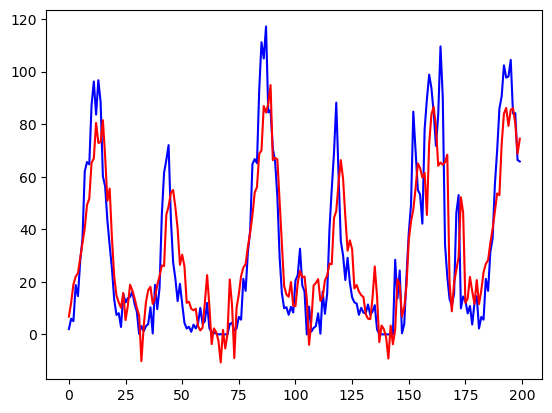

In [22]:
Y_preds = Y_preds.reshape(-1)
plt.plot(np.arange(len(Y_preds[:200])), Y_test[:200], color="blue")
plt.plot(np.arange(len(Y_preds[:200])), Y_preds[:200], color="red")
plt.show()

In [12]:
print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_preds))

Test MSE  : 303.812
